In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Food Prices.csv')

In [4]:
df.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1200 non-null   object 
 1   Year                 1200 non-null   int64  
 2   Month                1200 non-null   int64  
 3   Food Item            1200 non-null   object 
 4   Unit of Measurement  1200 non-null   object 
 5   Average Price        1200 non-null   float64
 6   Currency             1200 non-null   object 
 7   Price in USD         1200 non-null   float64
 8   Availability         1200 non-null   int64  
 9   Quality              1200 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 93.9+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1200.0,2020.000000,1.414803,2018.00,2019.0000,2020.000,2021.0000,2022.00
Month,1200.0,6.500000,3.453492,1.00,3.7500,6.500,9.2500,12.00
Average Price,1200.0,59.129550,103.155832,1.22,3.2075,13.355,28.8825,421.43
Price in USD,1200.0,1.801842,0.725390,0.69,1.1700,1.680,2.3200,4.03
Availability,1200.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.00


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns = df.columns.str.strip()


In [9]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))


In [10]:
df['Year'] = df['Date'].dt.year

In [50]:
annual_price_increase = df.groupby(['Country', 'Food Item', 'Year'])['Price in USD'].mean().pct_change()
annual_price_increase_df = annual_price_increase.reset_index()
display(annual_price_increase_df.style.format({
    'Price in USD': '{:,.2f}'.format,
}).set_caption('Annual price increase'))


,Country,Food Item,Year,Price in USD
0,Australia,Bread,2018,nan
1,Australia,Bread,2019,0.04
2,Australia,Bread,2020,0.04
3,Australia,Bread,2021,0.07
4,Australia,Bread,2022,0.11
5,Australia,Eggs,2018,0.13
6,Australia,Eggs,2019,0.05
7,Australia,Eggs,2020,0.05
8,Australia,Eggs,2021,0.21
9,Australia,Eggs,2022,0.30


In [52]:
avg_inflation = annual_price_increase.groupby(['Country', 'Food Item']).mean()
avg_inflation_df = avg_inflation.reset_index()
display(avg_inflation_df.style.format({
    0: '{:,.2%}'.format,
}).set_caption('Average inflation'))

,Country,Food Item,Price in USD
0,Australia,Bread,0.061488
1,Australia,Eggs,0.147950
2,Australia,Milk,-0.086665
3,Australia,Potatoes,0.210536
4,Canada,Bread,-0.012850
5,Canada,Eggs,0.057010
6,Canada,Milk,-0.062447
7,Canada,Potatoes,0.030679
8,Japan,Bread,-0.070819
9,Japan,Eggs,0.048128


In [55]:
# This analysis provides a simplified representation of the average price of these essential food items in each country. 
df_country_year = df.groupby(['Country', 'Year'])['Price in USD']
avg_price = df_country_year.mean().unstack()
display(avg_price.style.format('{:,.2f}'.format).set_caption('Average price per year'))

Year,2018,2019,2020,2021,2022
Country,,,,,
Australia,1.66,1.74,1.84,2.03,2.35
Canada,2.29,2.34,2.38,2.43,2.52
Japan,1.73,1.76,1.81,1.85,1.92
South Africa,0.96,0.99,1.03,1.07,1.13
Sweden,1.64,1.72,1.82,1.92,2.10


In [54]:
annual_avg_price = df_country_year.mean().reset_index()
display(annual_avg_price.style.format({
    'Price in USD': '{:,.2f}'.format,
}).set_caption('Annual average price'))

,Country,Year,Price in USD
0,Australia,2018,1.66
1,Australia,2019,1.74
2,Australia,2020,1.84
3,Australia,2021,2.03
4,Australia,2022,2.35
5,Canada,2018,2.29
6,Canada,2019,2.34
7,Canada,2020,2.38
8,Canada,2021,2.43
9,Canada,2022,2.52


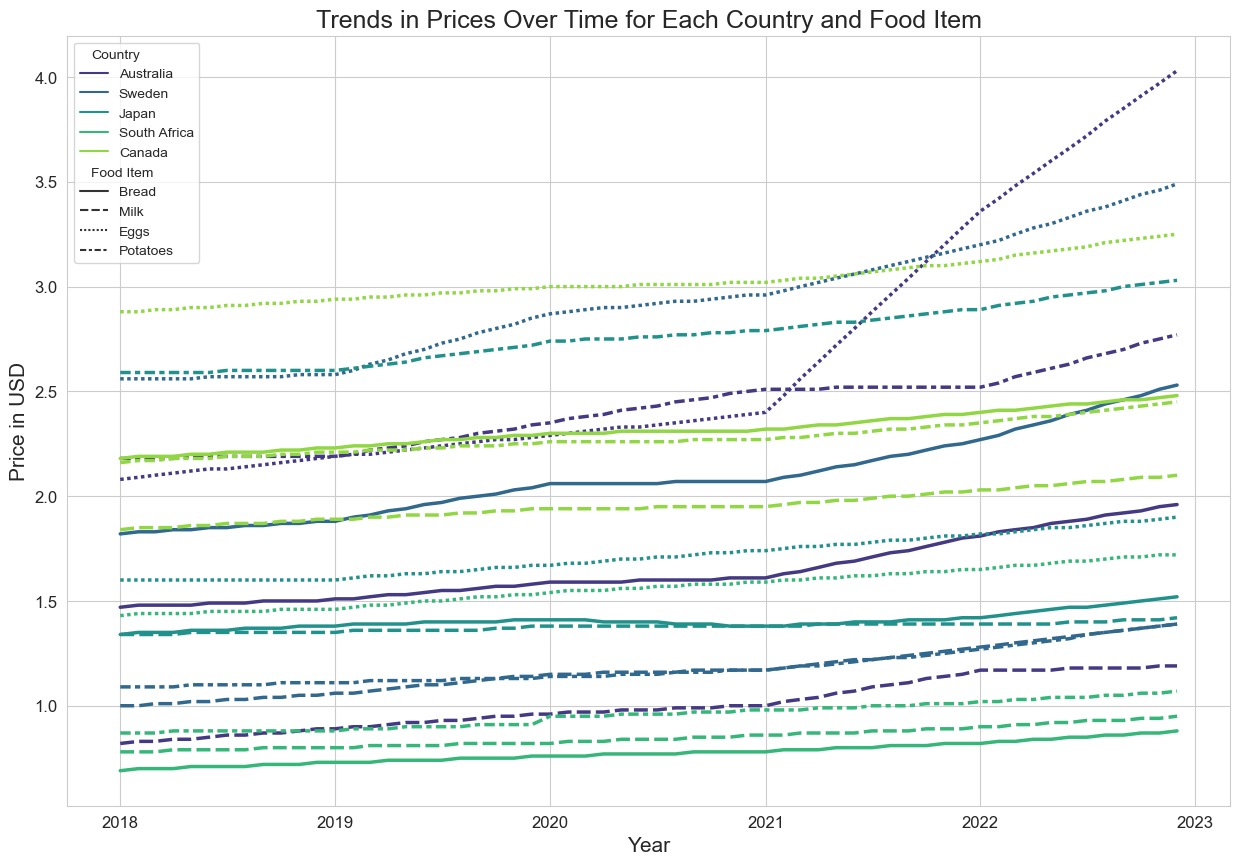

In [49]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.lineplot(data=df, x='Date', y='Price in USD', hue='Country', style='Food Item', palette='viridis', linewidth=2.5)
plt.title('Trends in Prices Over Time for Each Country and Food Item', fontsize=18)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
#notice egg price changes in Australia starting from 2021

In [18]:
#in general food prices in South Africa are much cheaper

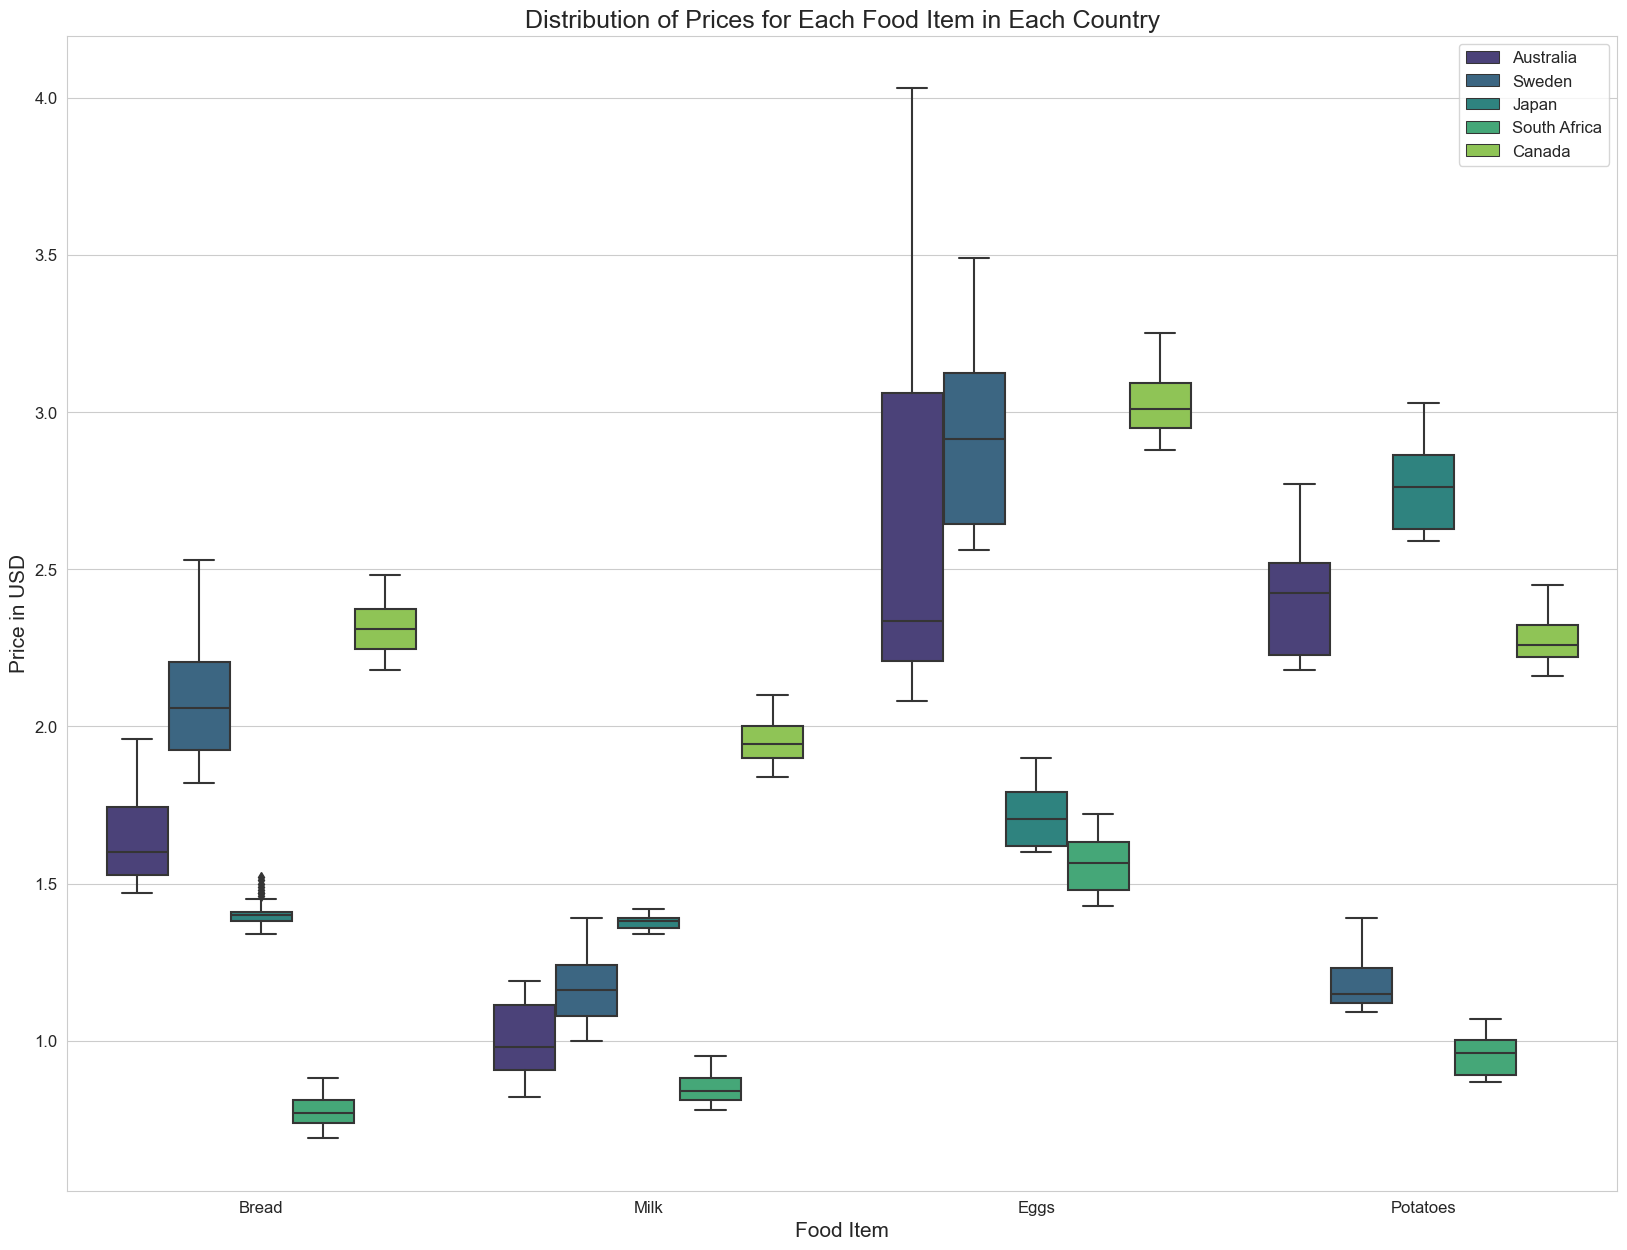

In [47]:
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
sns.boxplot(data=df, x='Food Item', y='Price in USD', hue='Country', palette='viridis')
plt.title('Distribution of Prices for Each Food Item in Each Country', fontsize=18)
plt.xlabel('Food Item', fontsize=15)
plt.ylabel('Price in USD', fontsize=15)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

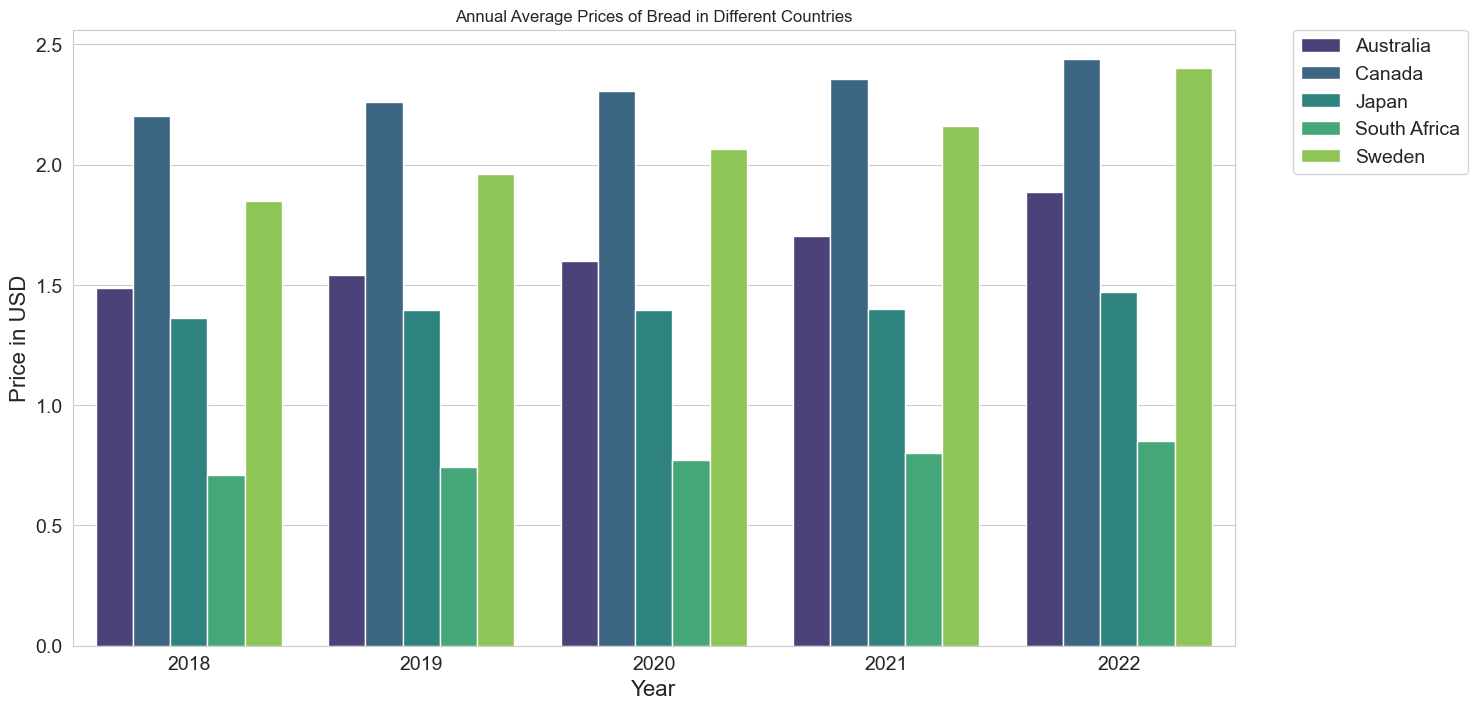

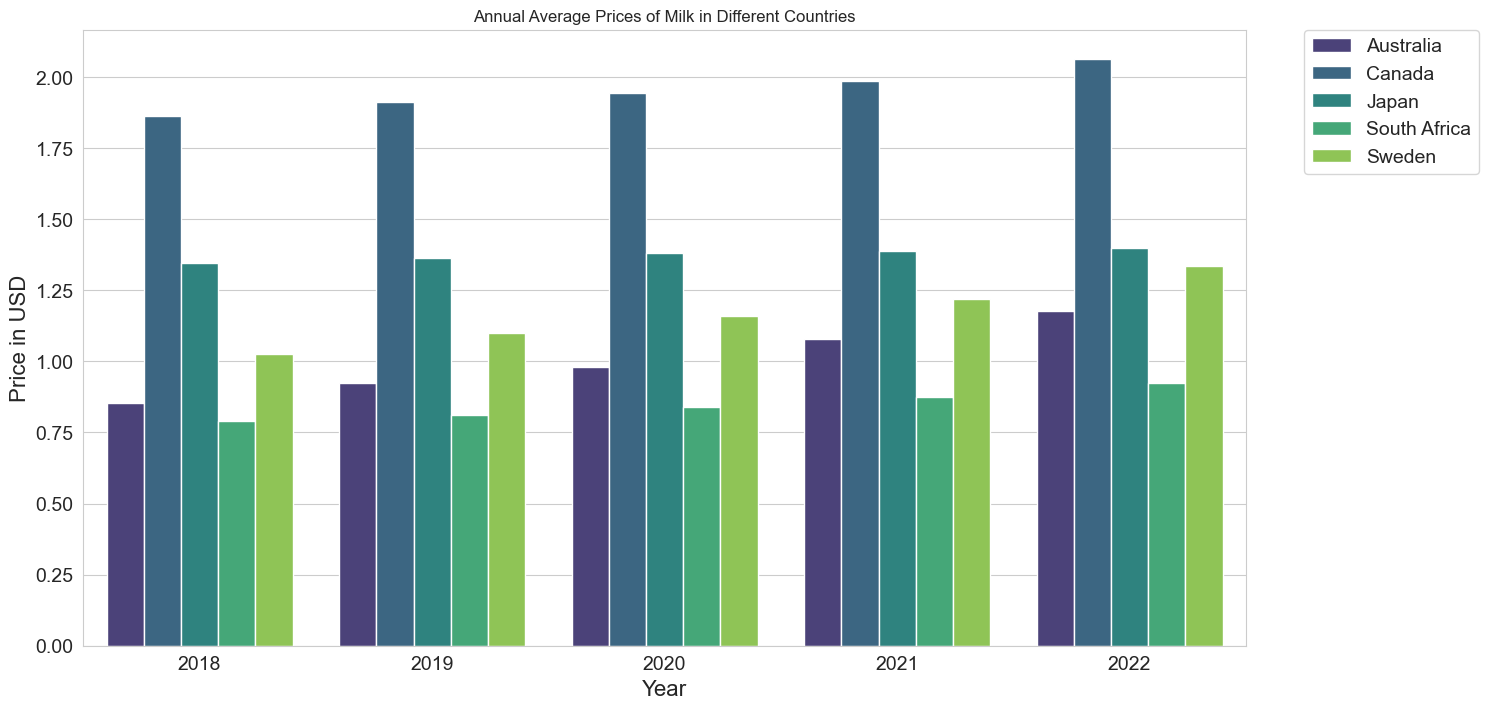

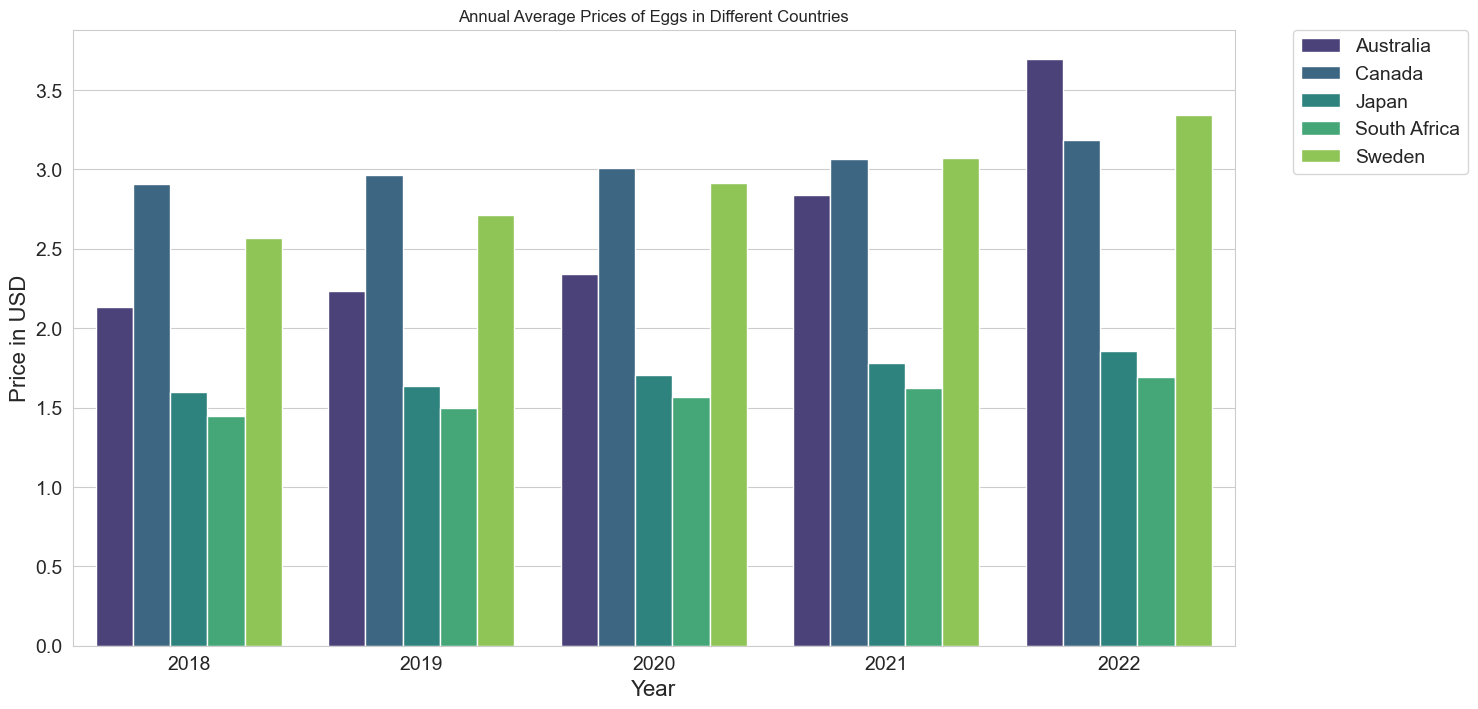

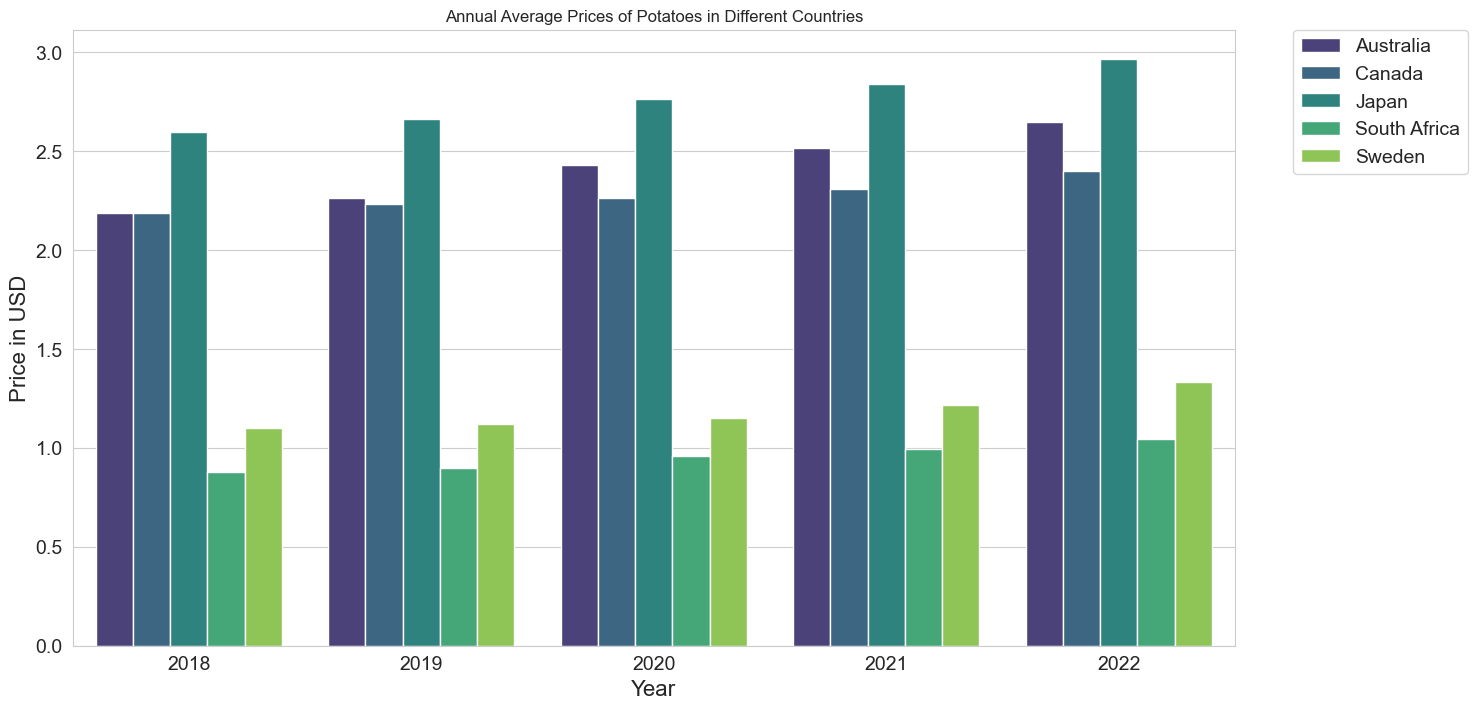

In [41]:
per_item_aap = df.groupby(['Country', 'Year', 'Food Item'])['Price in USD'].mean().reset_index()

sns.set_style('whitegrid')

food_items = df['Food Item'].unique()

for item in food_items:
    plt.figure(figsize=(15, 8))
    sns.barplot(data=per_item_aap[per_item_aap['Food Item']==item],
                x='Year', y='Price in USD', hue='Country', palette='viridis')
    plt.title('Annual Average Prices of {} in Different Countries'.format(item))
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Price in USD', fontsize=16)
    
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0., fontsize=14)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()

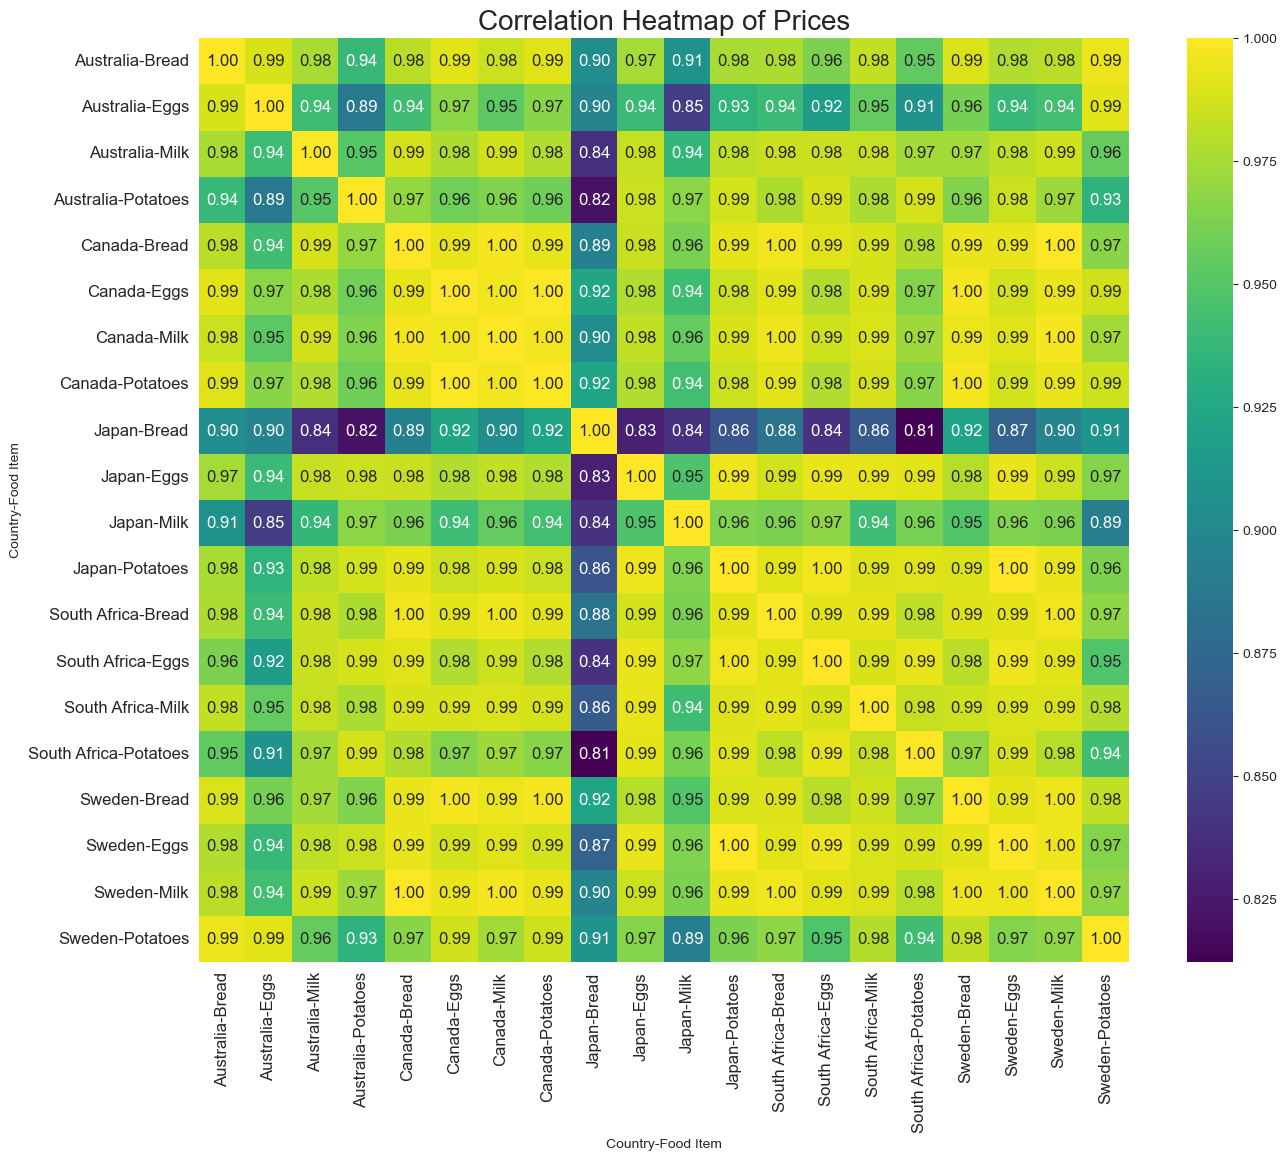

In [45]:
pivot_table = df.pivot_table(values='Price in USD', index='Date', columns=['Country', 'Food Item'])

corr_matrix = pivot_table.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', annot_kws={'size':12})
plt.title('Correlation Heatmap of Prices', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
